In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

keras.__version__

Using TensorFlow backend.


'2.2.4'

In [27]:
from keras.datasets import imdb
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [7]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


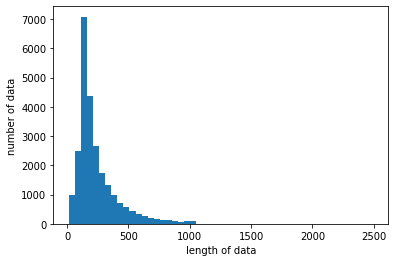

In [8]:
plt.hist([len(s) for s in train_data] ,bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가(len(sequences), dimension))이고 모든 원소가 0인 행렬을 만든다
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1. # results[i]에서 트정 인덱스의 위치를 1로 만든다
    return results
# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [11]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# 원본 훈련 데이터에서 10000의 샘플을 떼어서 검증 세트를 만들어야 함
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 7s 442us/step - loss: 0.5355 - acc: 0.7732 - val_loss: 0.4014 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.3219 - acc: 0.8979 - val_loss: 0.3269 - val_acc: 0.8735
Epoch 3/20
15000/15000 [==============================] - 4s 293us/step - loss: 0.2358 - acc: 0.9234 - val_loss: 0.2860 - val_acc: 0.8885
Epoch 4/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.1849 - acc: 0.9399 - val_loss: 0.2734 - val_acc: 0.8913
Epoch 5/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.1526 - acc: 0.9511 - val_loss: 0.2990 - val_acc: 0.8815
Epoch 6/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.1233 - acc: 0.9616 - val_loss: 0.2870 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 5s 305us/step - loss: 0.1070 - acc: 0.9666 - val_loss: 0.3030 -

In [16]:
# 학습 시 발생하는 모든 정보를 담고 있음
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

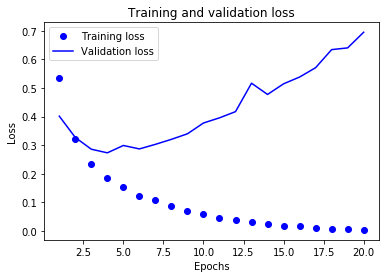

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 'bo'는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

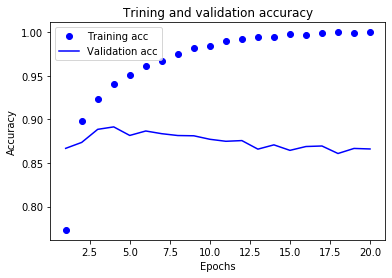

In [18]:
plt.clf() # 그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# epochs를 4로 낮춤
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results) # [, acc]

Epoch 1/4
25000/25000 [==============================] - 6s 251us/step - loss: 0.4584 - acc: 0.8132
Epoch 2/4
25000/25000 [==============================] - 5s 191us/step - loss: 0.2630 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 5s 192us/step - loss: 0.2006 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 6s 251us/step
[0.29871264441490175, 0.8824]


In [23]:
# 모델 테스트
model.predict(x_test)

array([[0.2120977 ],
       [0.9994989 ],
       [0.9272812 ],
       ...,
       [0.14252687],
       [0.10413891],
       [0.70740515]], dtype=float32)